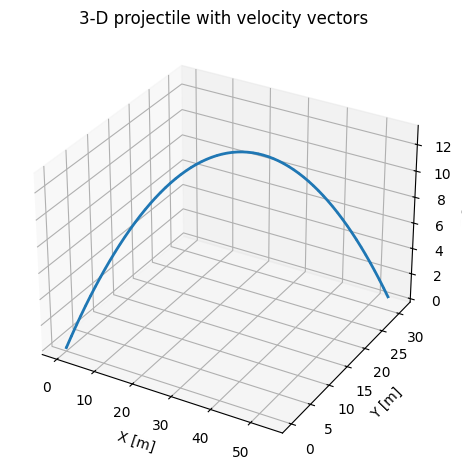

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D   # noqa: F401 (registers the 3-D proj)

# ------------------------------------------------------------------
# 1.  Build (or import) your trajectory
# ------------------------------------------------------------------
g = 9.81               # m s⁻², downward along −Z
v0 = 25.0              # launch speed, m s⁻¹
theta, phi = 40, 30    # elevation & azimuth in degrees
t_max, dt = 5.0, 0.05  # simulation window & time-step

theta, phi = np.deg2rad([theta, phi])
v0x = v0*np.cos(theta)*np.cos(phi)
v0y = v0*np.cos(theta)*np.sin(phi)
v0z = v0*np.sin(theta)

t = np.arange(0, t_max, dt)
x = v0x*t
y = v0y*t
z = v0z*t - 0.5*g*t**2

# stop when the projectile hits the ground (z = 0)
mask = z >= 0
x, y, z, t = x[mask], y[mask], z[mask], t[mask]

# ------------------------------------------------------------------
# 2.  Velocity components & speed
#     (central differences ⇒ same length as x, y, z)
# ------------------------------------------------------------------
vx = np.gradient(x, t)
vy = np.gradient(y, t)
vz = np.gradient(z, t)
speed = np.sqrt(vx**2 + vy**2 + vz**2)

# ------------------------------------------------------------------
# 3.  Build arrow components so that arrow length ∝ |v|
# ------------------------------------------------------------------
# normalise each velocity vector, multiply by a scaling factor * speed
scale = 0.15 / speed.max()           # tweak 0.15 for visual size
ux, uy, uz = vx/speed, vy/speed, vz/speed
u = ux * speed * scale
v = uy * speed * scale
w = uz * speed * scale

# ------------------------------------------------------------------
# 4.  Plot
# ------------------------------------------------------------------
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot(x, y, z, linewidth=2)                     # trajectory
ax.quiver(x, y, z, u, v, w, length=1.0, normalize=False)

ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_zlabel('Z [m]')
ax.set_title('3-D projectile with velocity vectors')

plt.tight_layout()
plt.show()
